In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.csv to churn_prediction.csv


In [ ]:
data1 = pd.read_csv('churn_prediction.csv')

In [ ]:
data1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data1.drop('customerID',axis = 'columns',inplace = True)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
no_churn = data1[data1['Churn']=='No'].tenure
yes_churn = data1[data1['Churn']=='Yes'].tenure

Text(0, 0.5, 'No. of Customers')

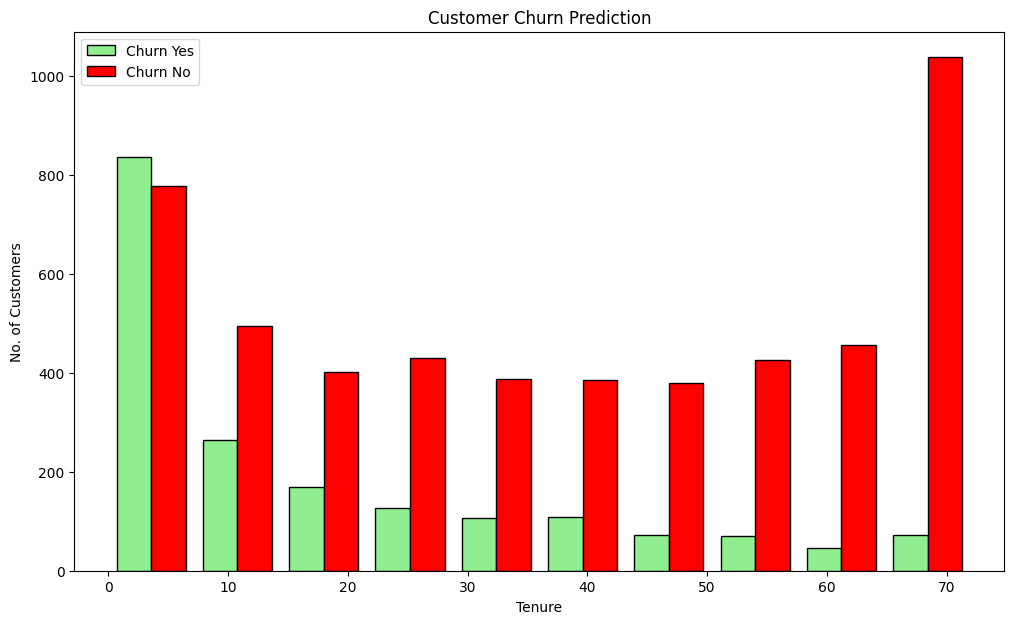

In [ ]:
plt.figure(figsize=(12,7))#chart size
plt.hist([yes_churn,no_churn],color=['lightgreen','red'],edgecolor = 'black')
plt.legend(labels=['Churn Yes','Churn No'])
plt.title('Customer Churn Prediction')
plt.xlabel('Tenure')
plt.ylabel('No. of Customers')

In [ ]:
no_churn_monthly = data1[data1['Churn']=='No'].MonthlyCharges
yes_churn_monthly = data1[data1['Churn']=='Yes'].MonthlyCharges

Text(0, 0.5, 'No. of Customers')

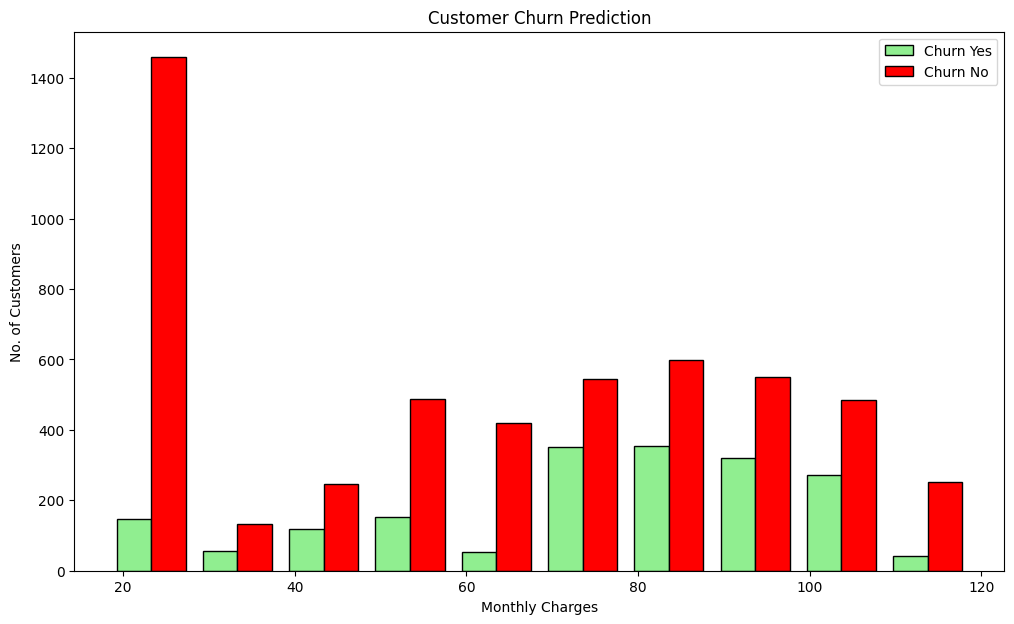

In [ ]:
plt.figure(figsize=(12,7))
plt.hist([yes_churn_monthly,no_churn_monthly],color=['lightgreen','red'],edgecolor='black')
plt.legend(labels=['Churn Yes','Churn No'])
plt.title('Customer Churn Prediction')
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')

Text(0.5, 1.0, 'churn yes and no')

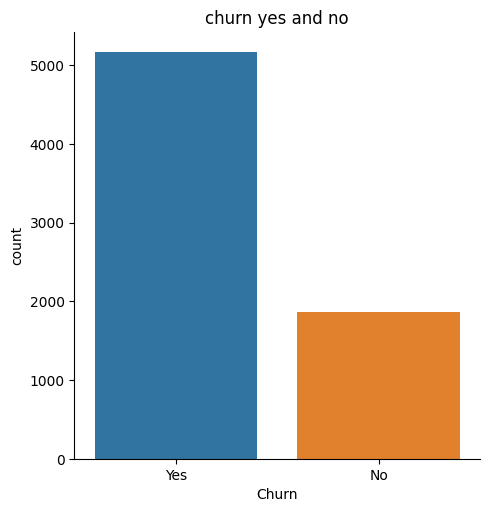

In [ ]:
sns.catplot(x='Churn',kind='count',data=data2)
plt.title('churn yes and no')

In [ ]:
former = data2[data2['Churn']=='Yes']
current = data2[data2['Churn']=='No']
print(len(former))
print(len(current))

5163
1869


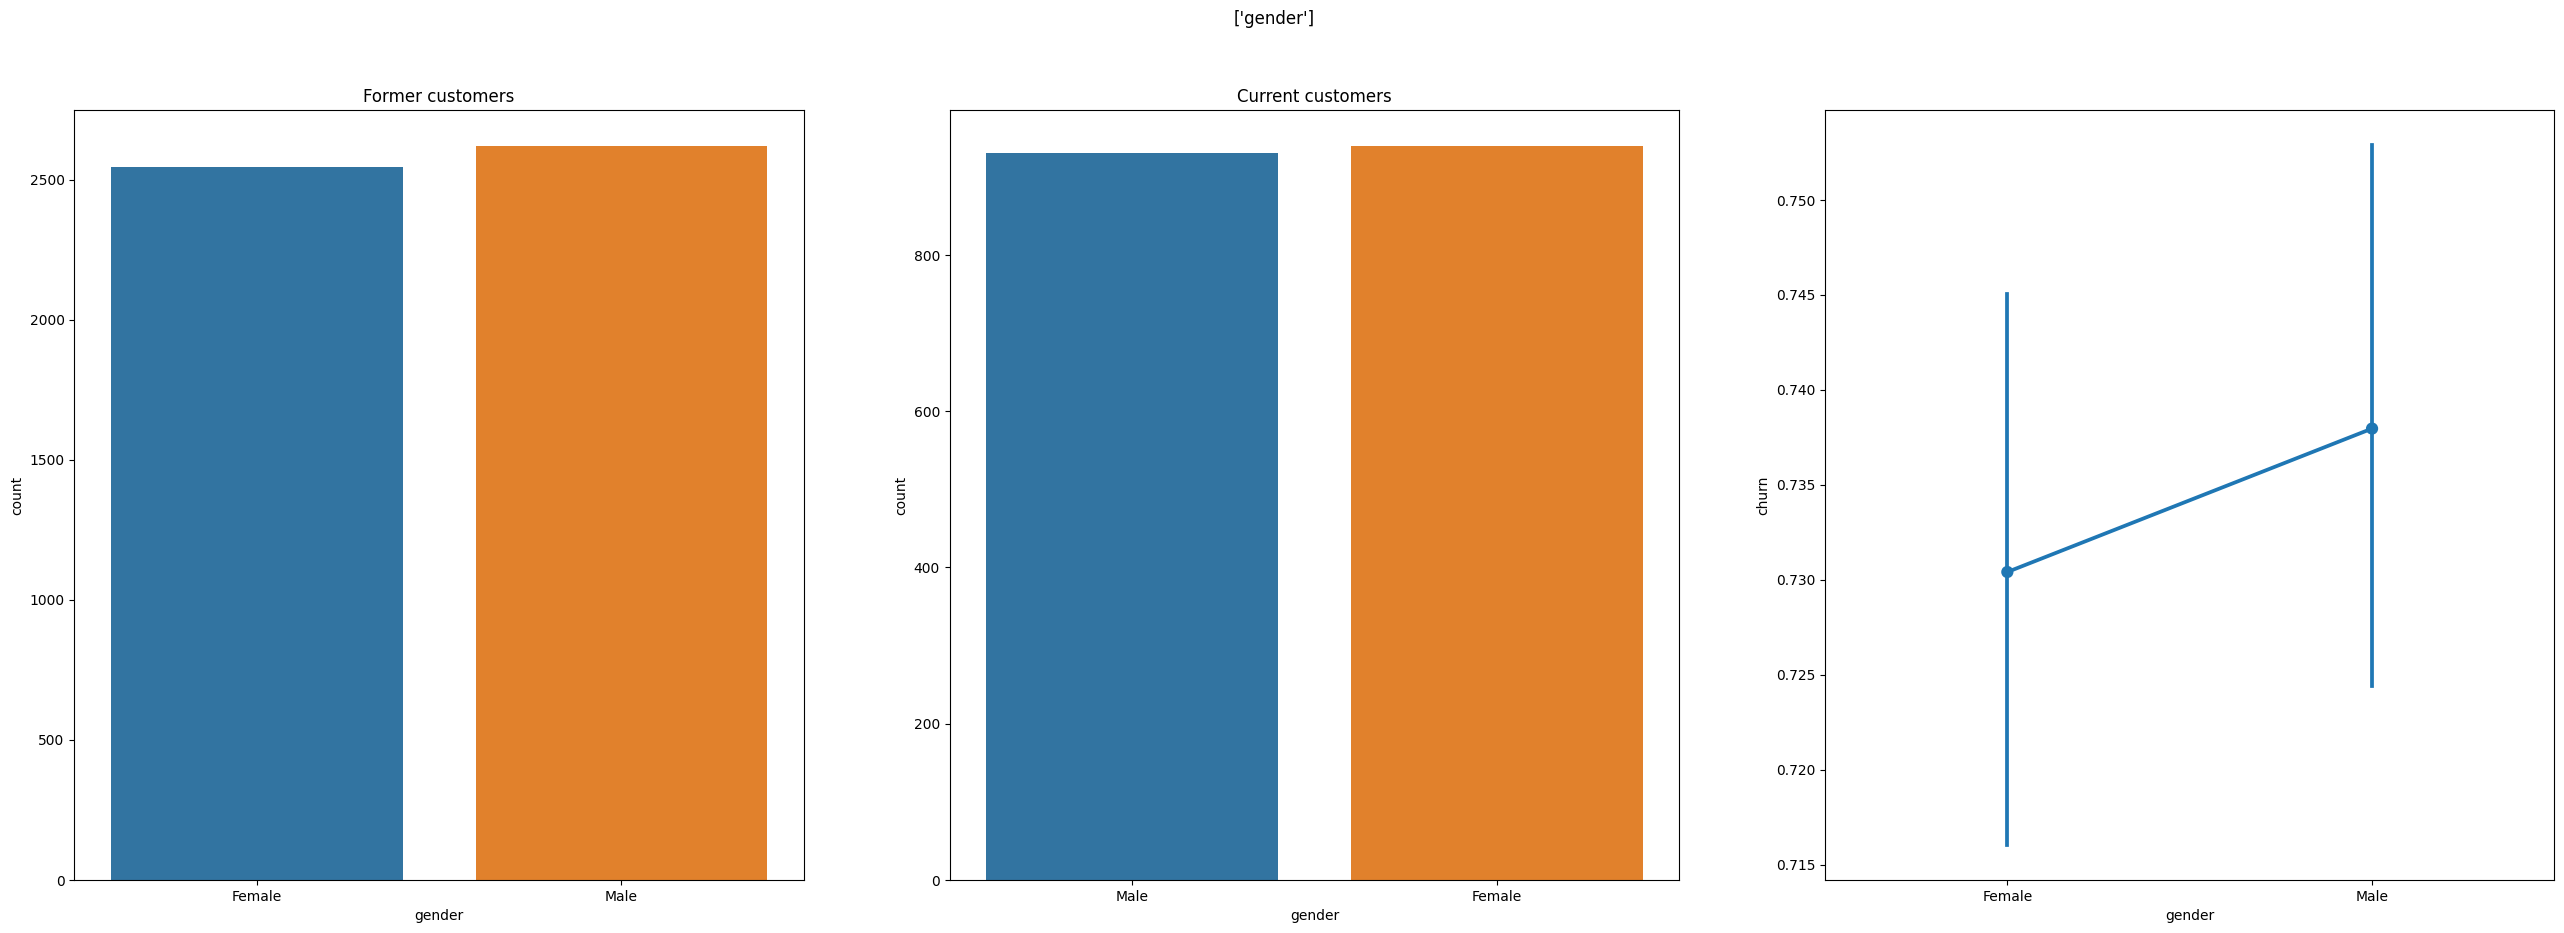

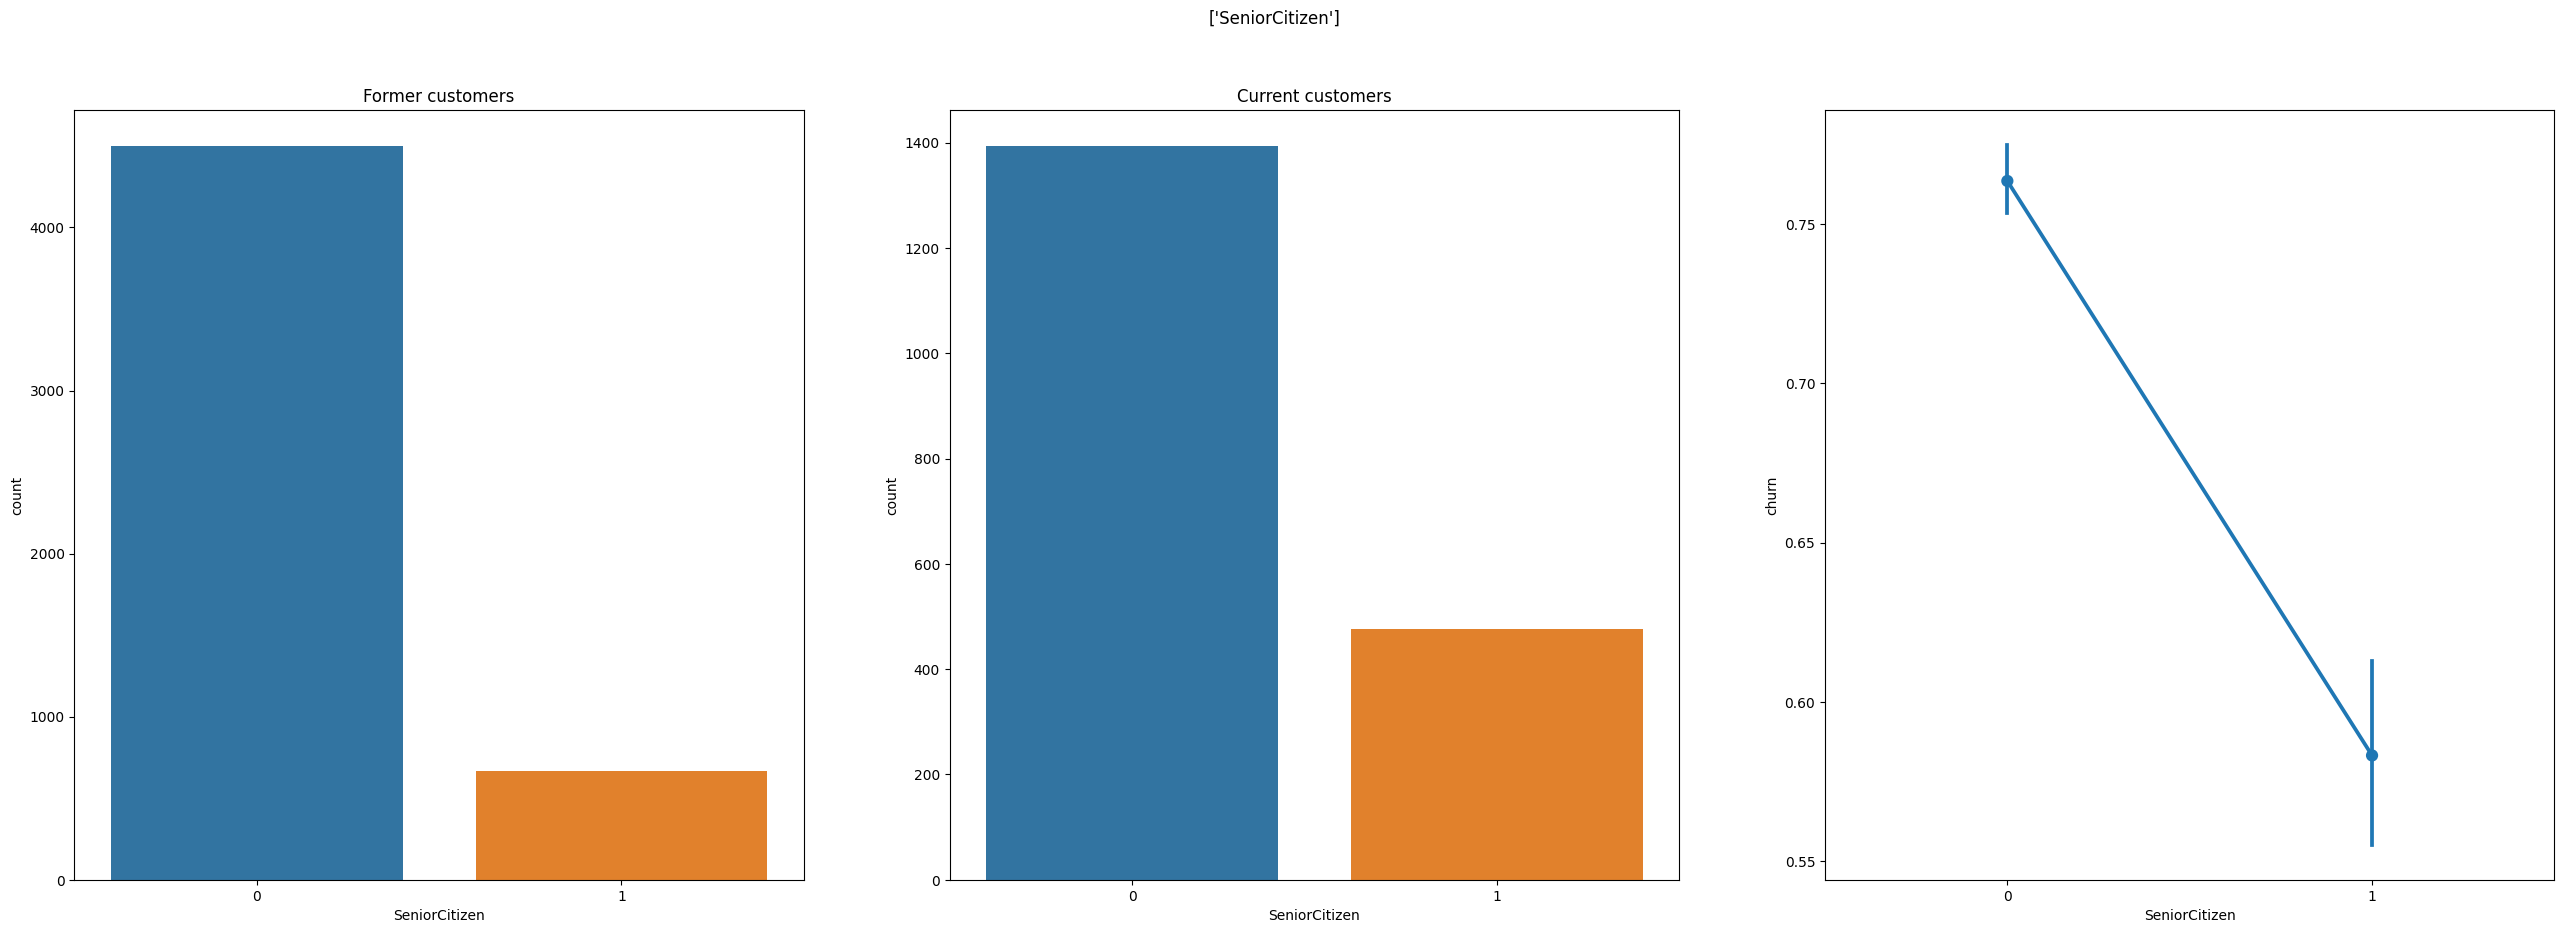

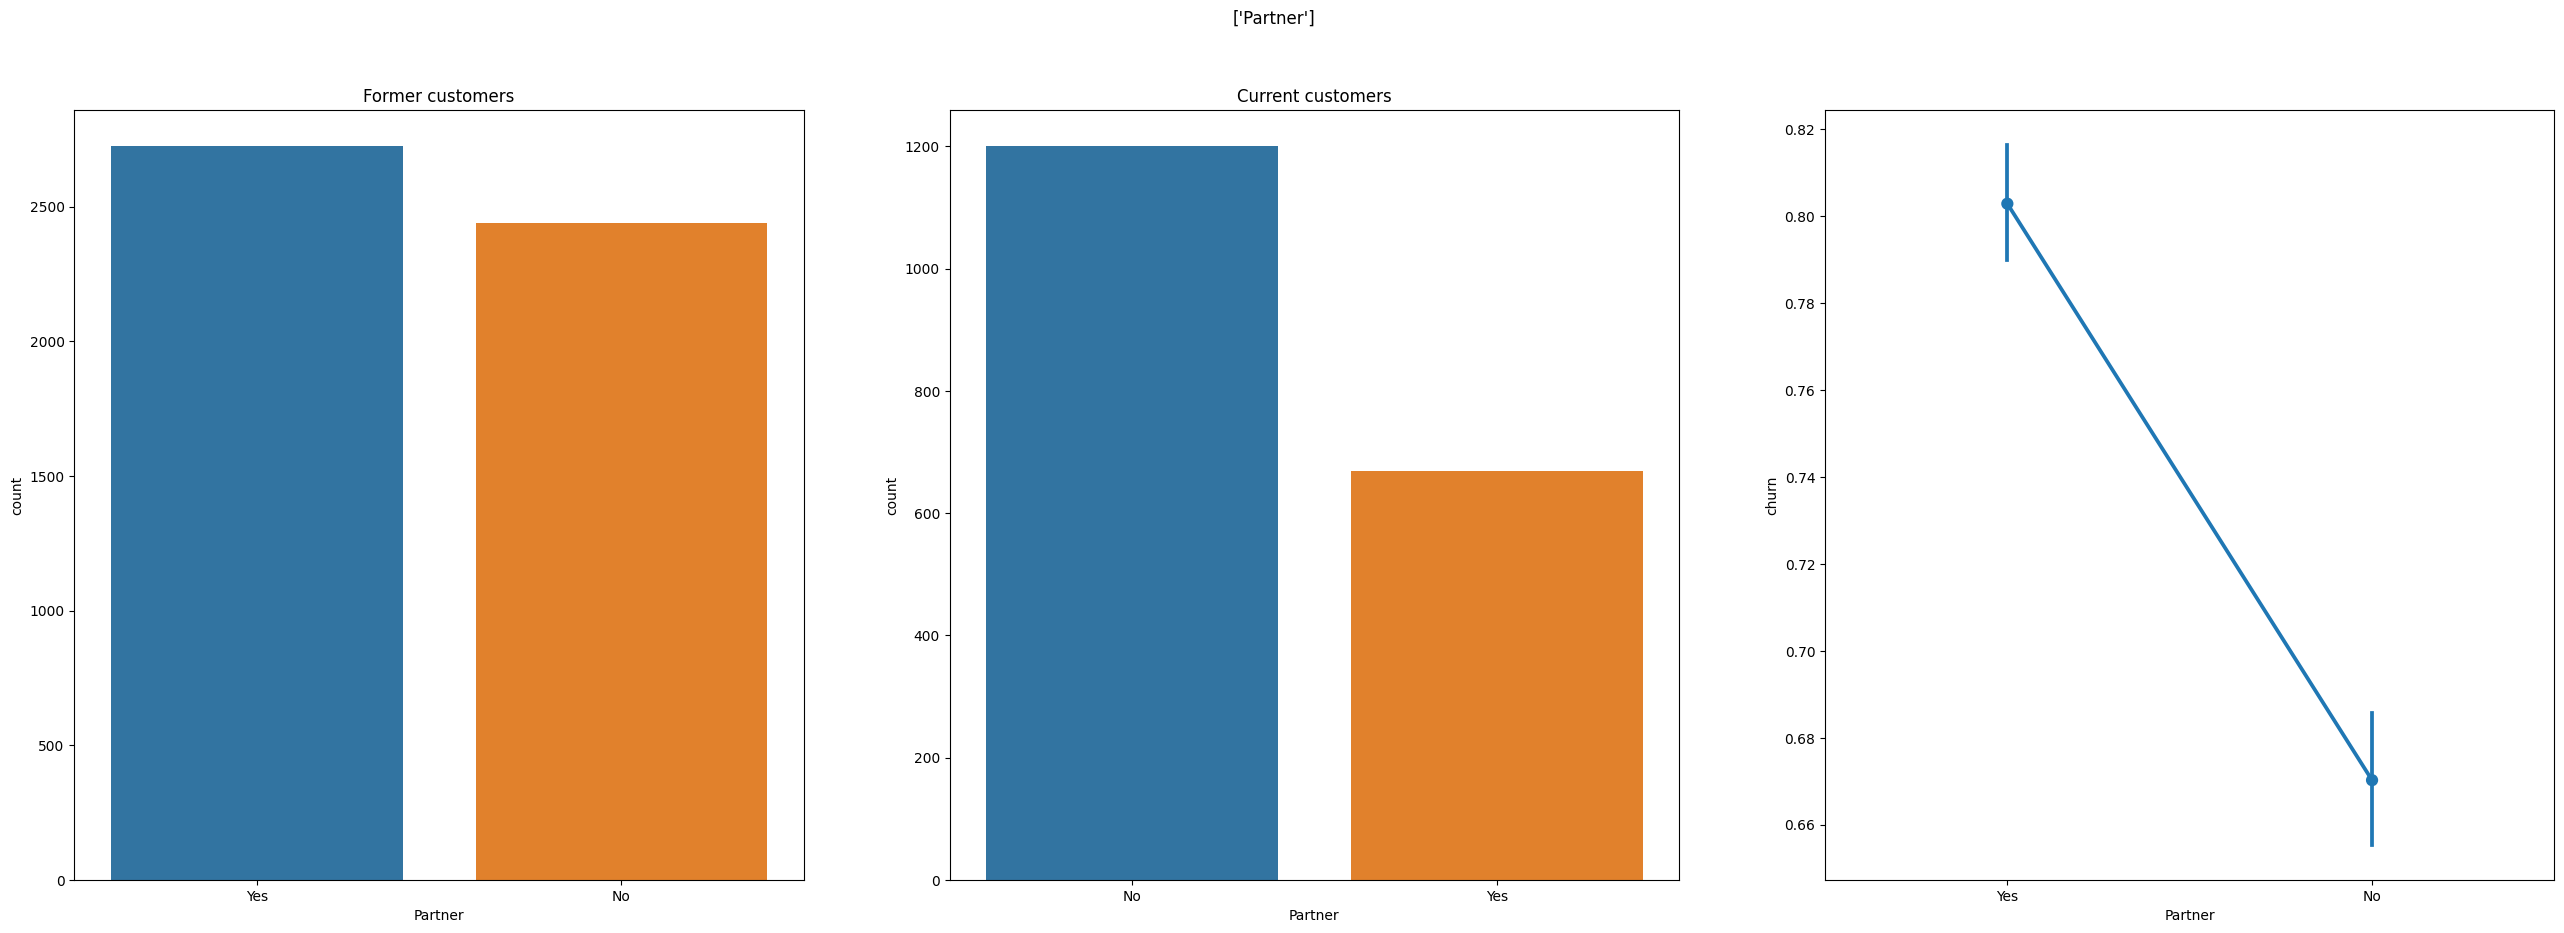

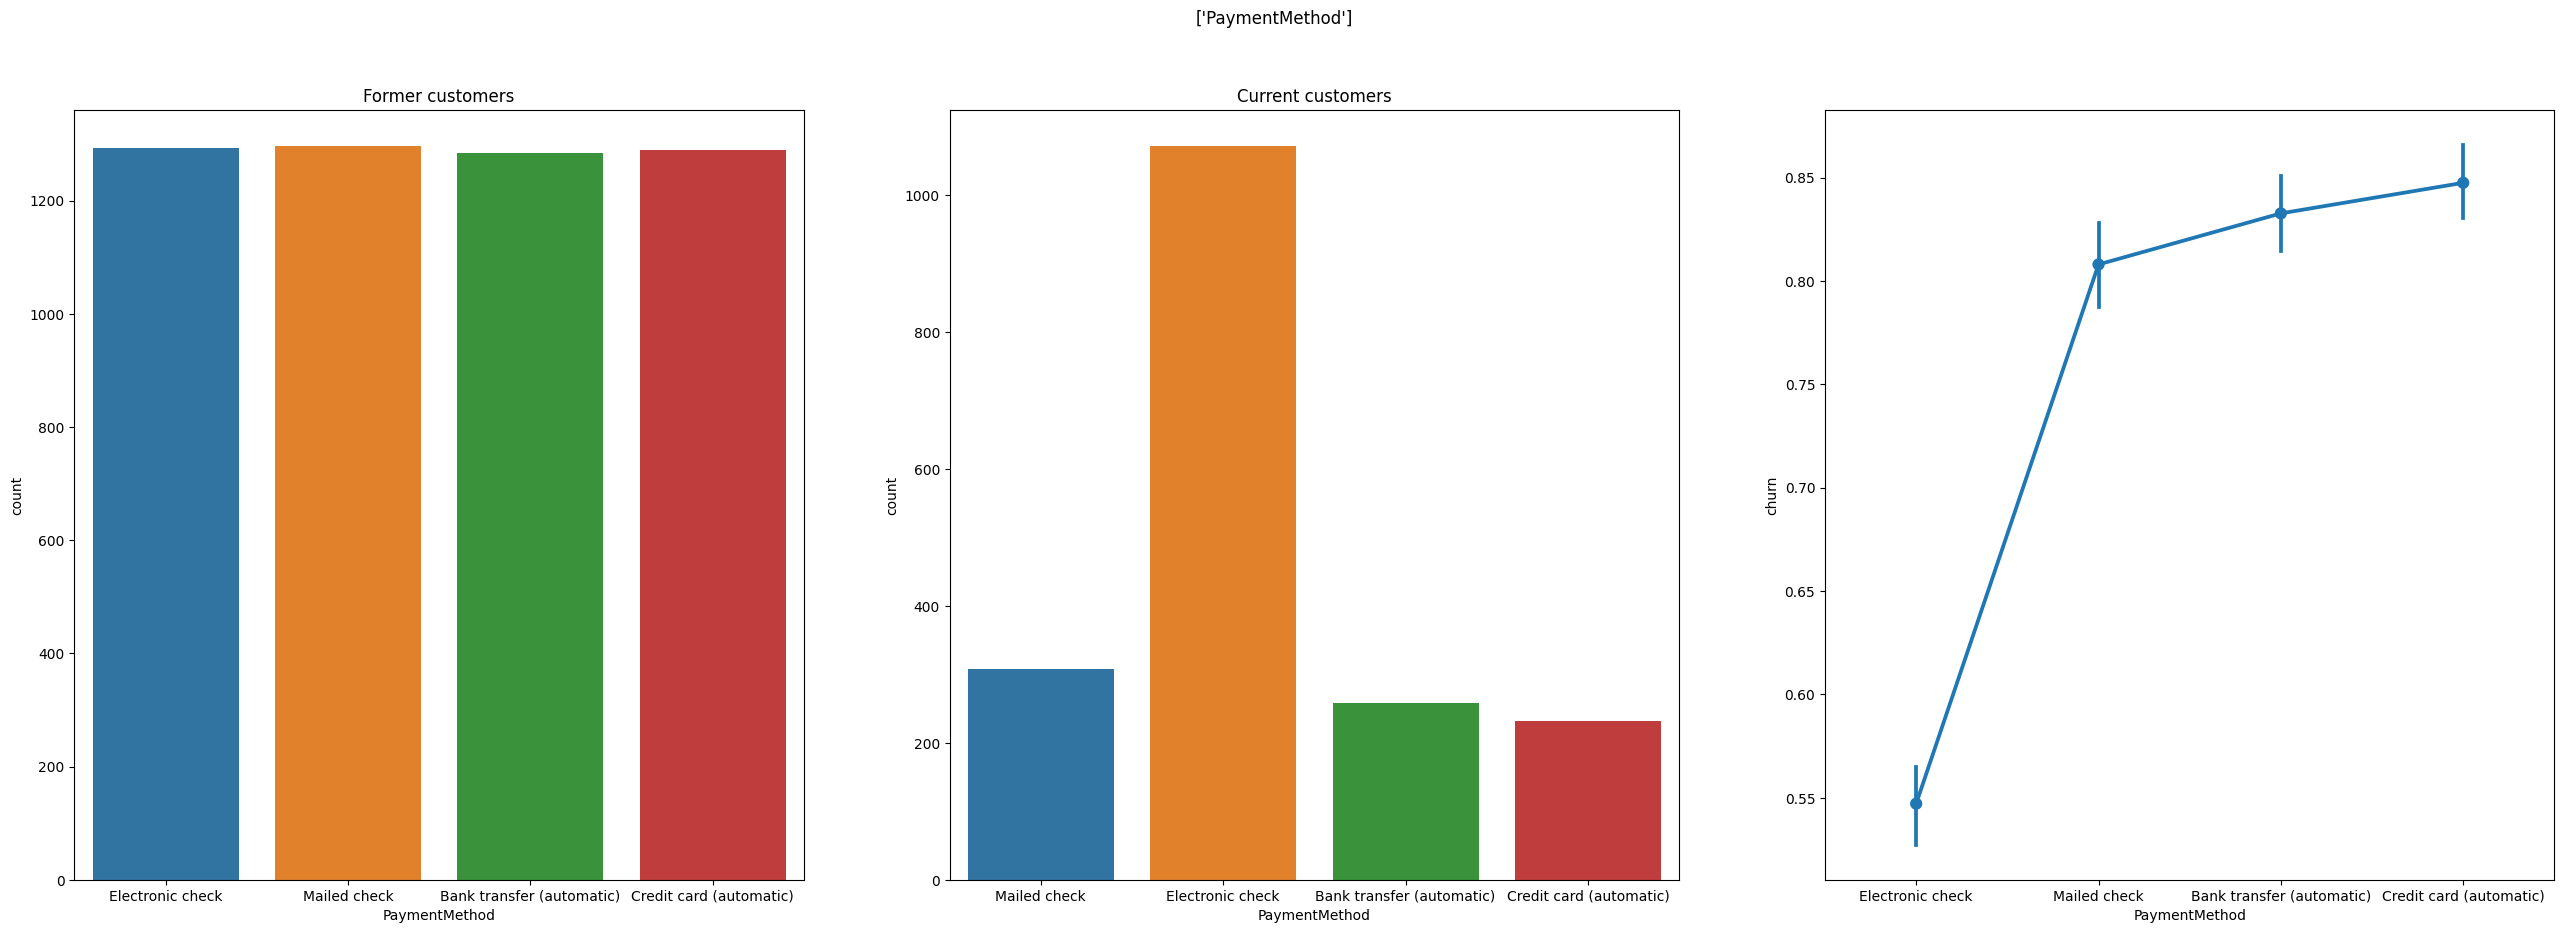

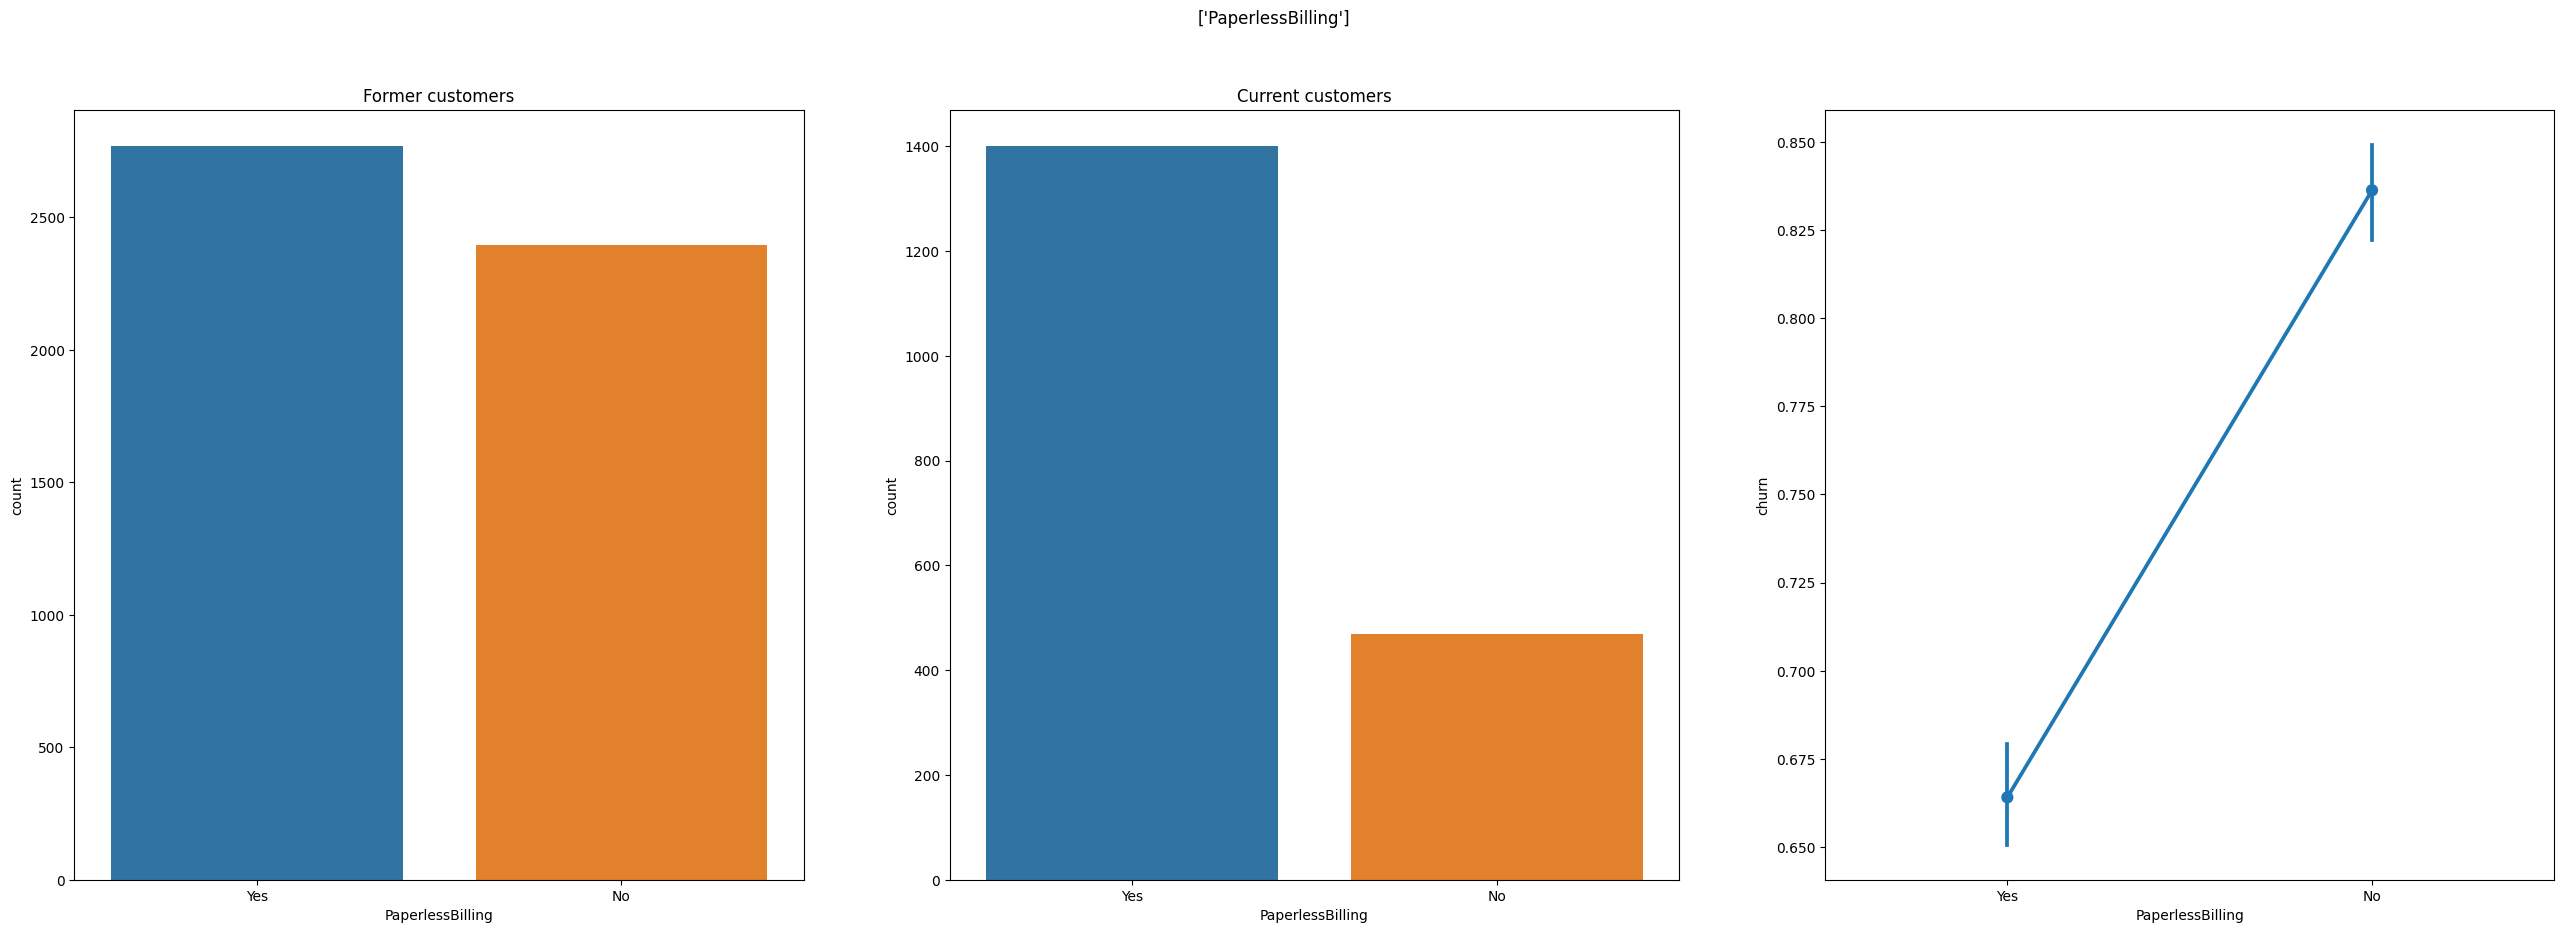

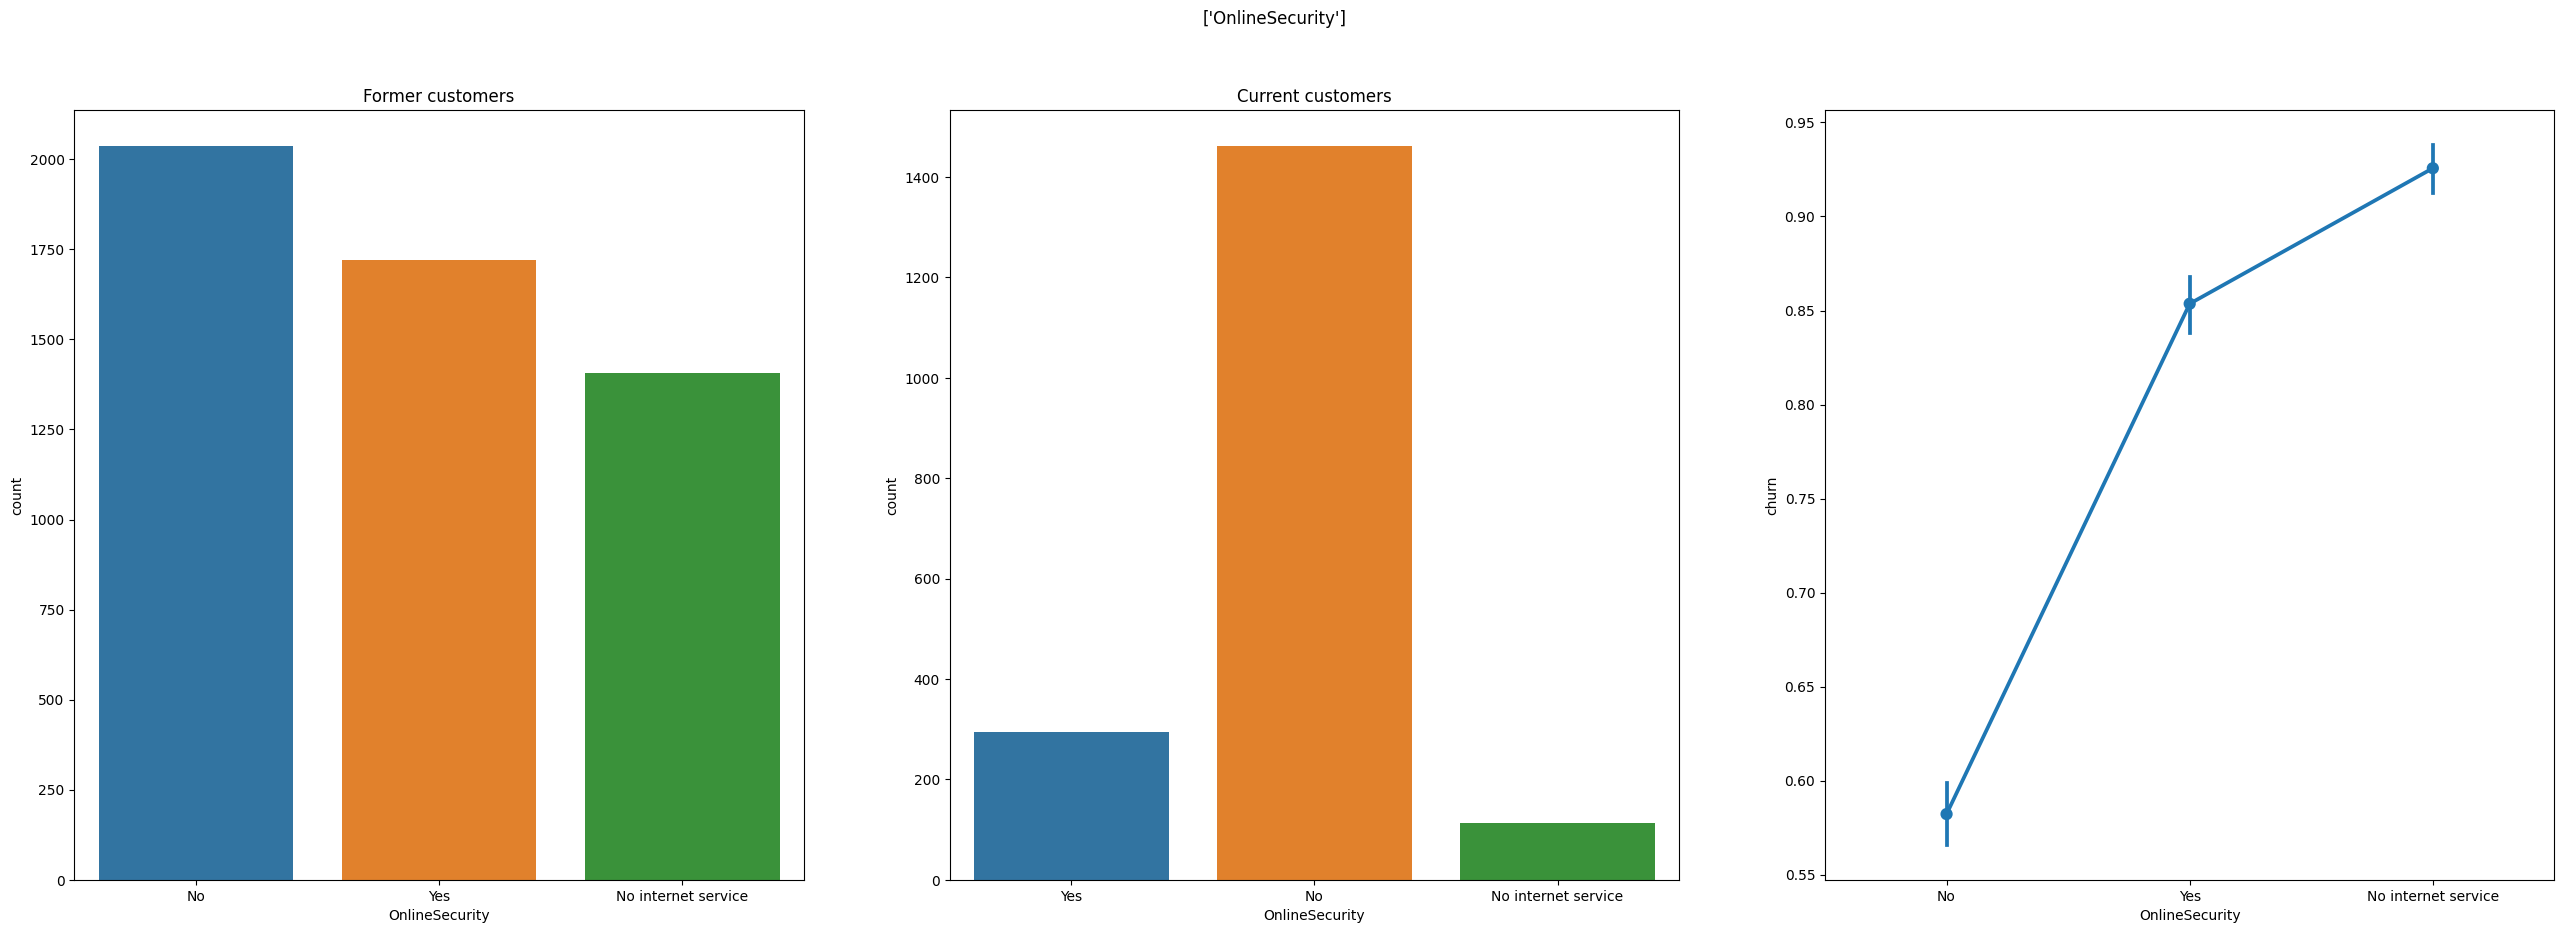

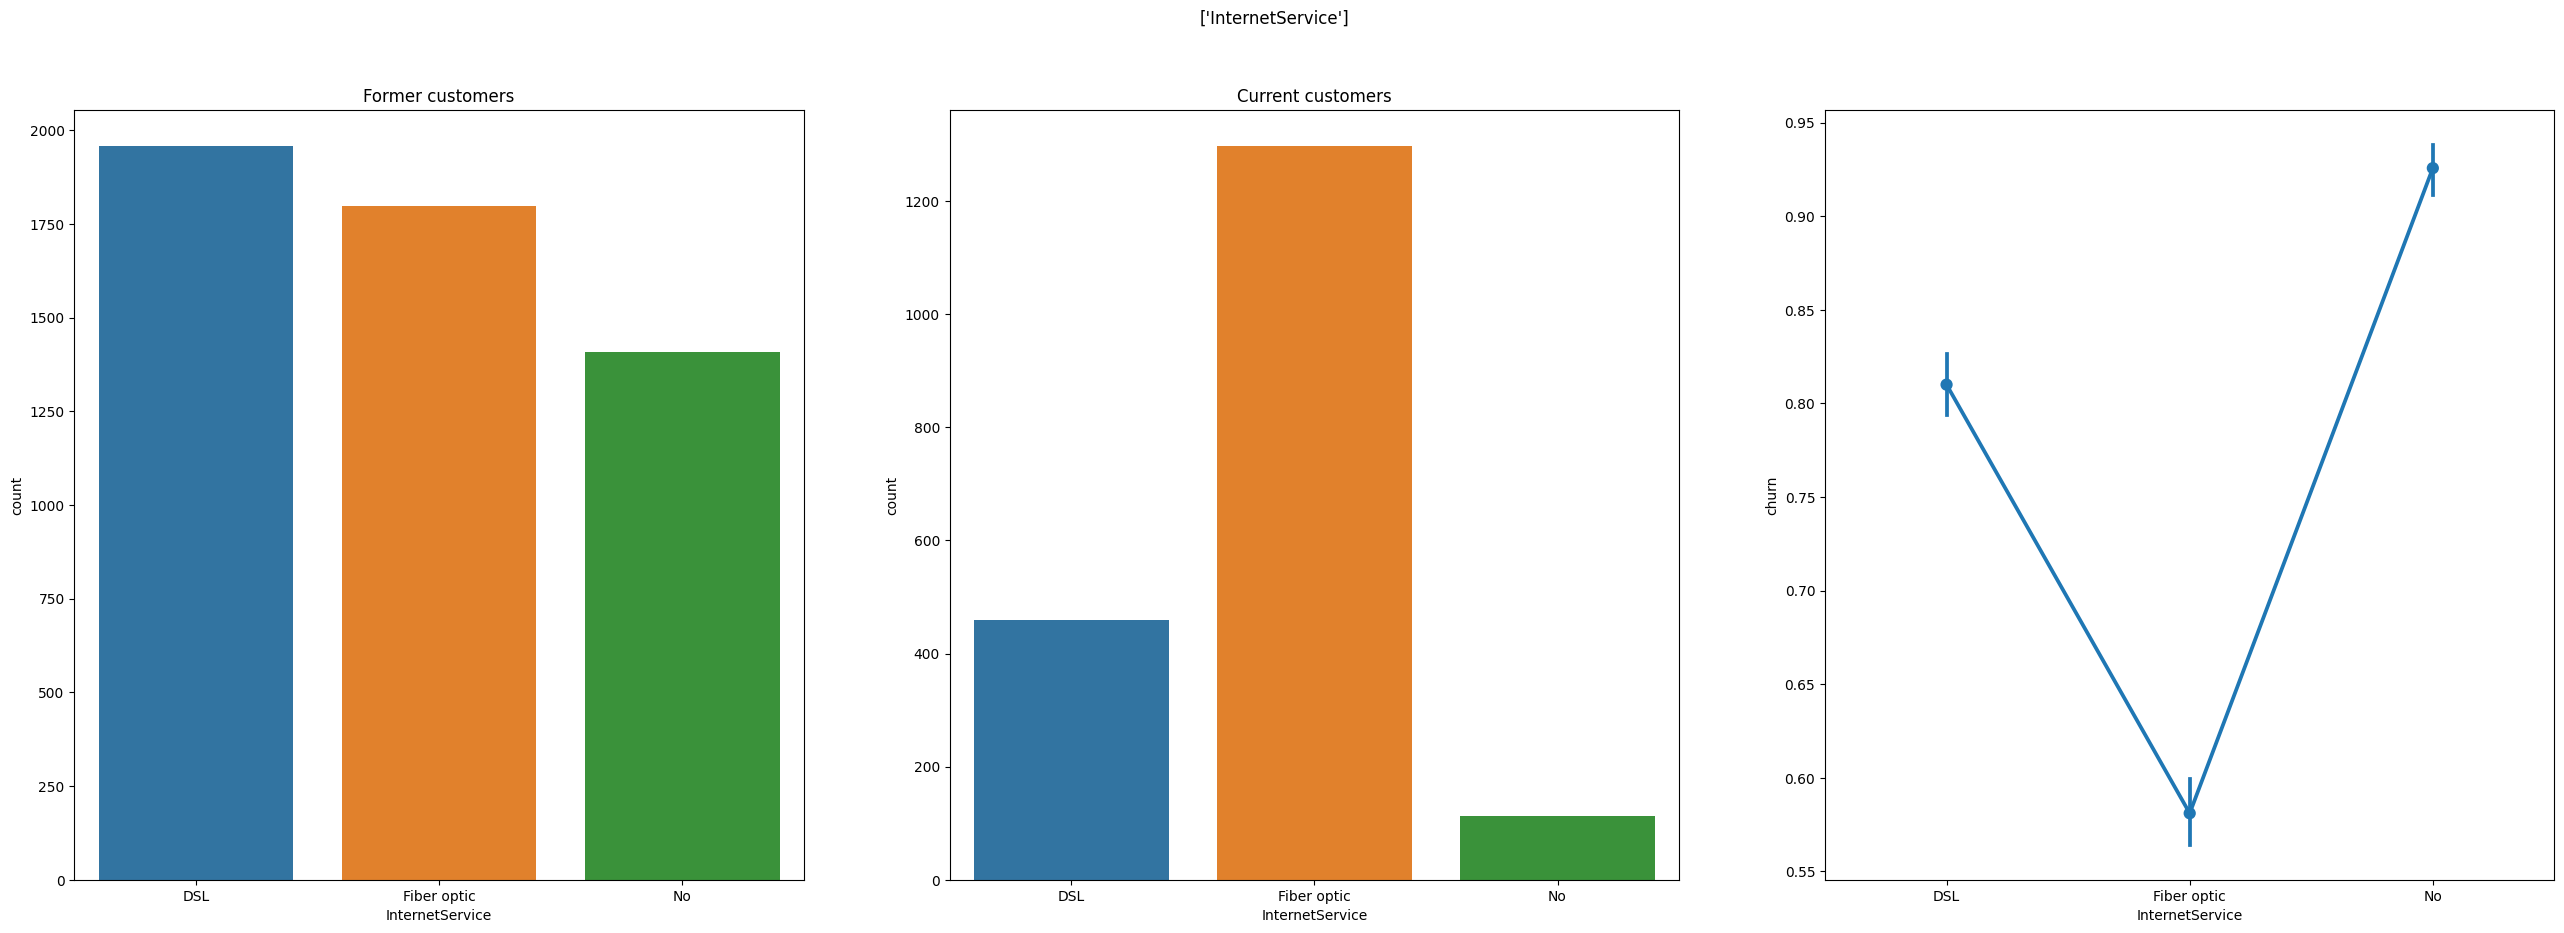

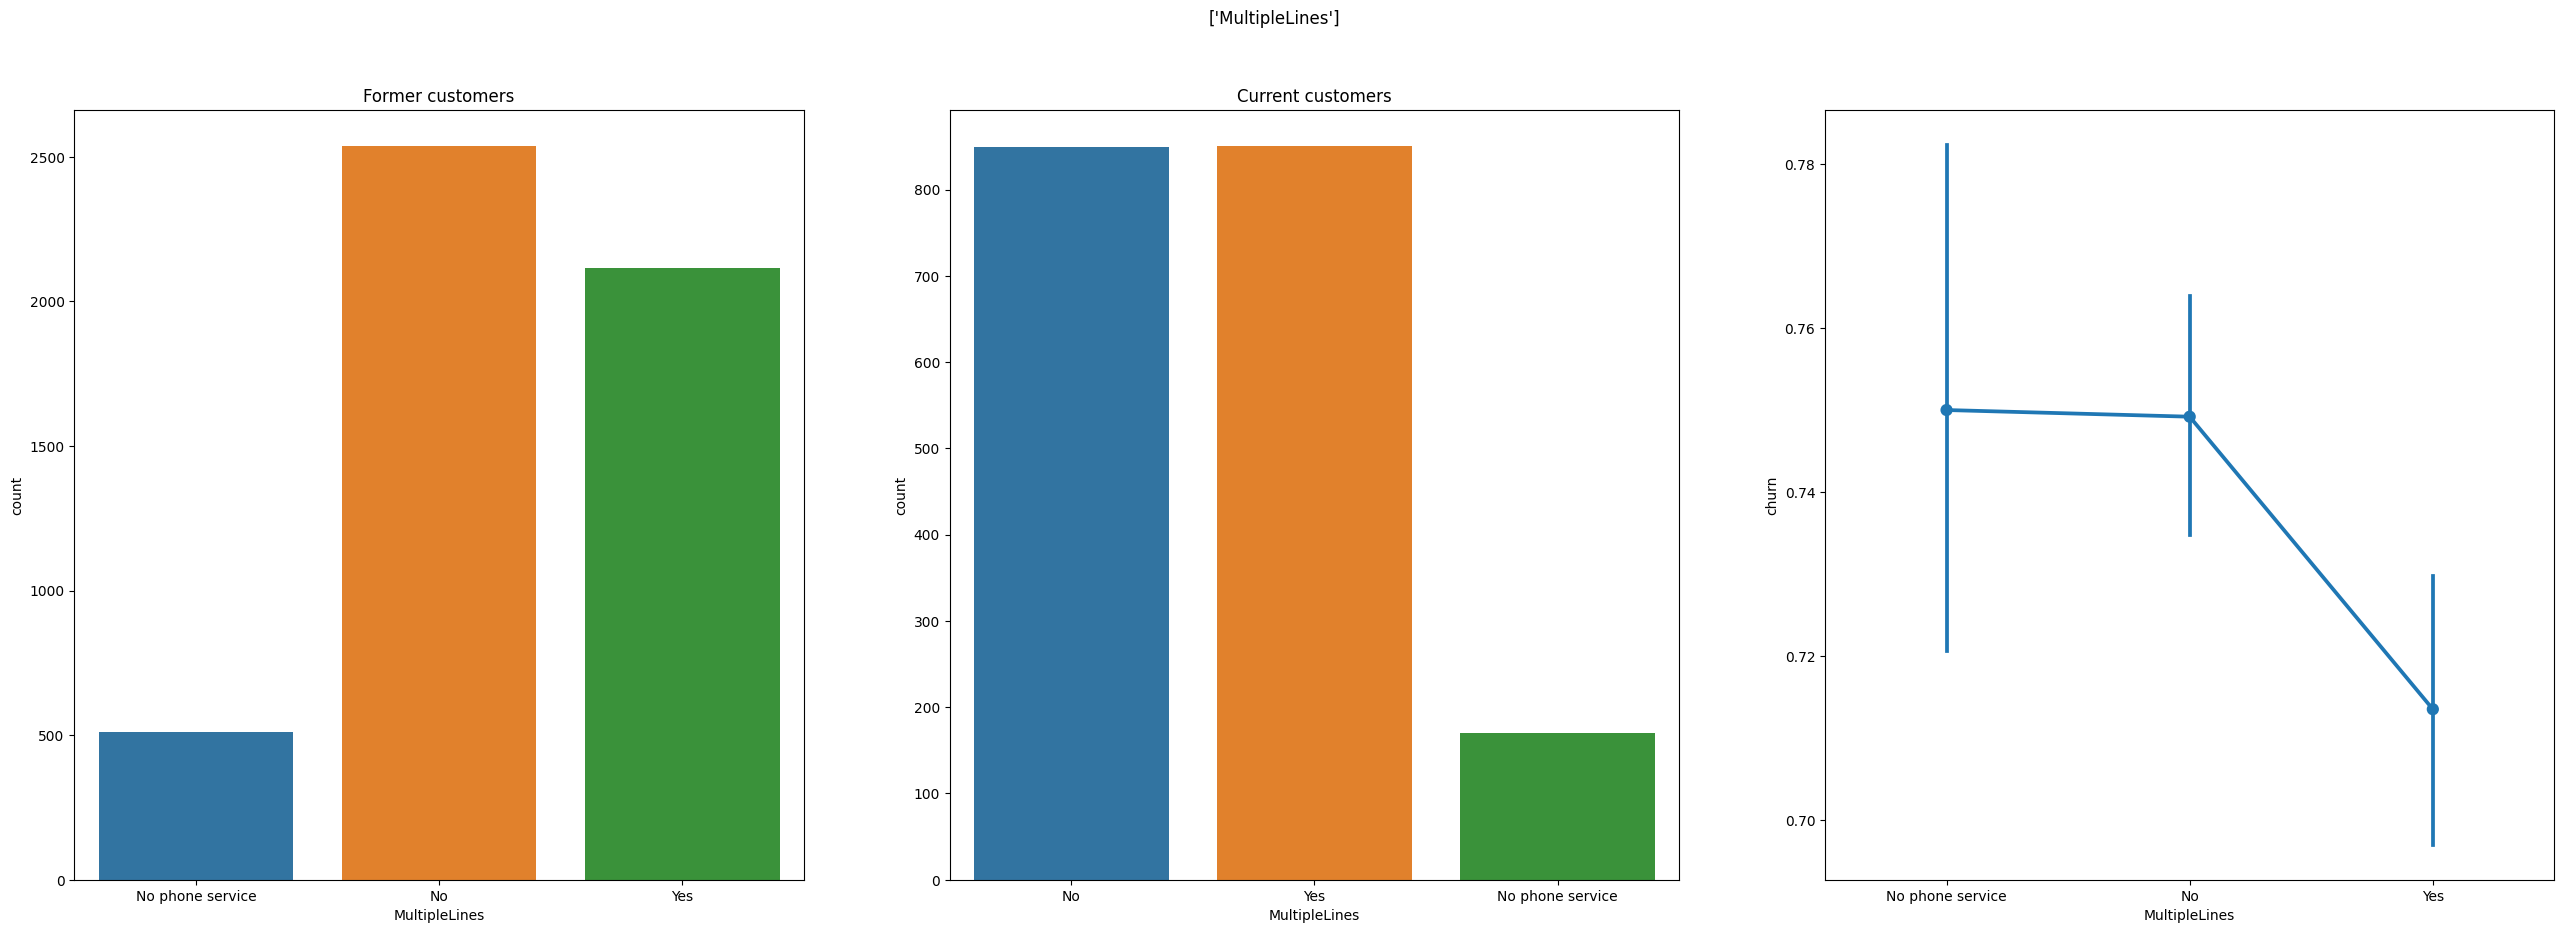

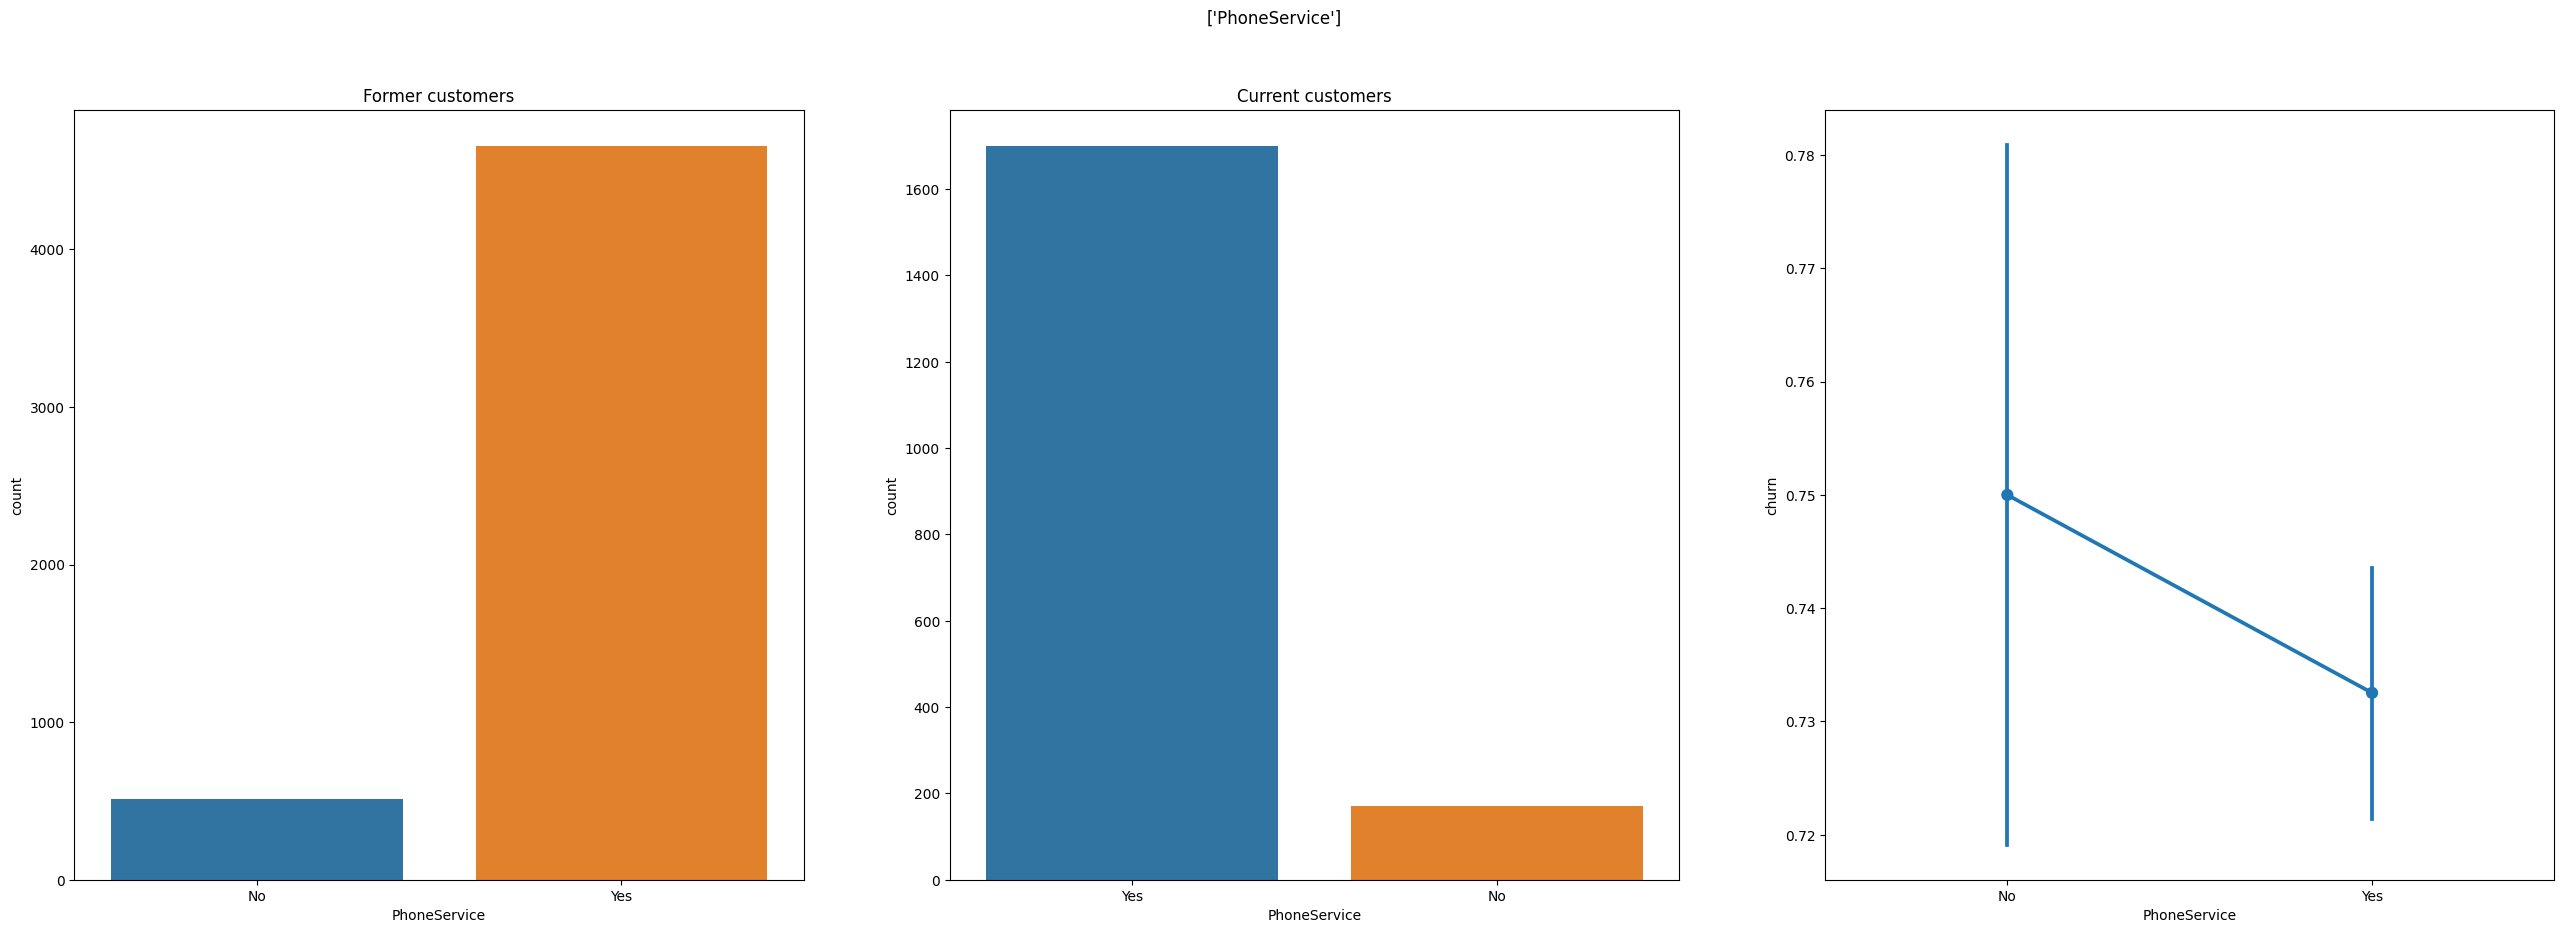

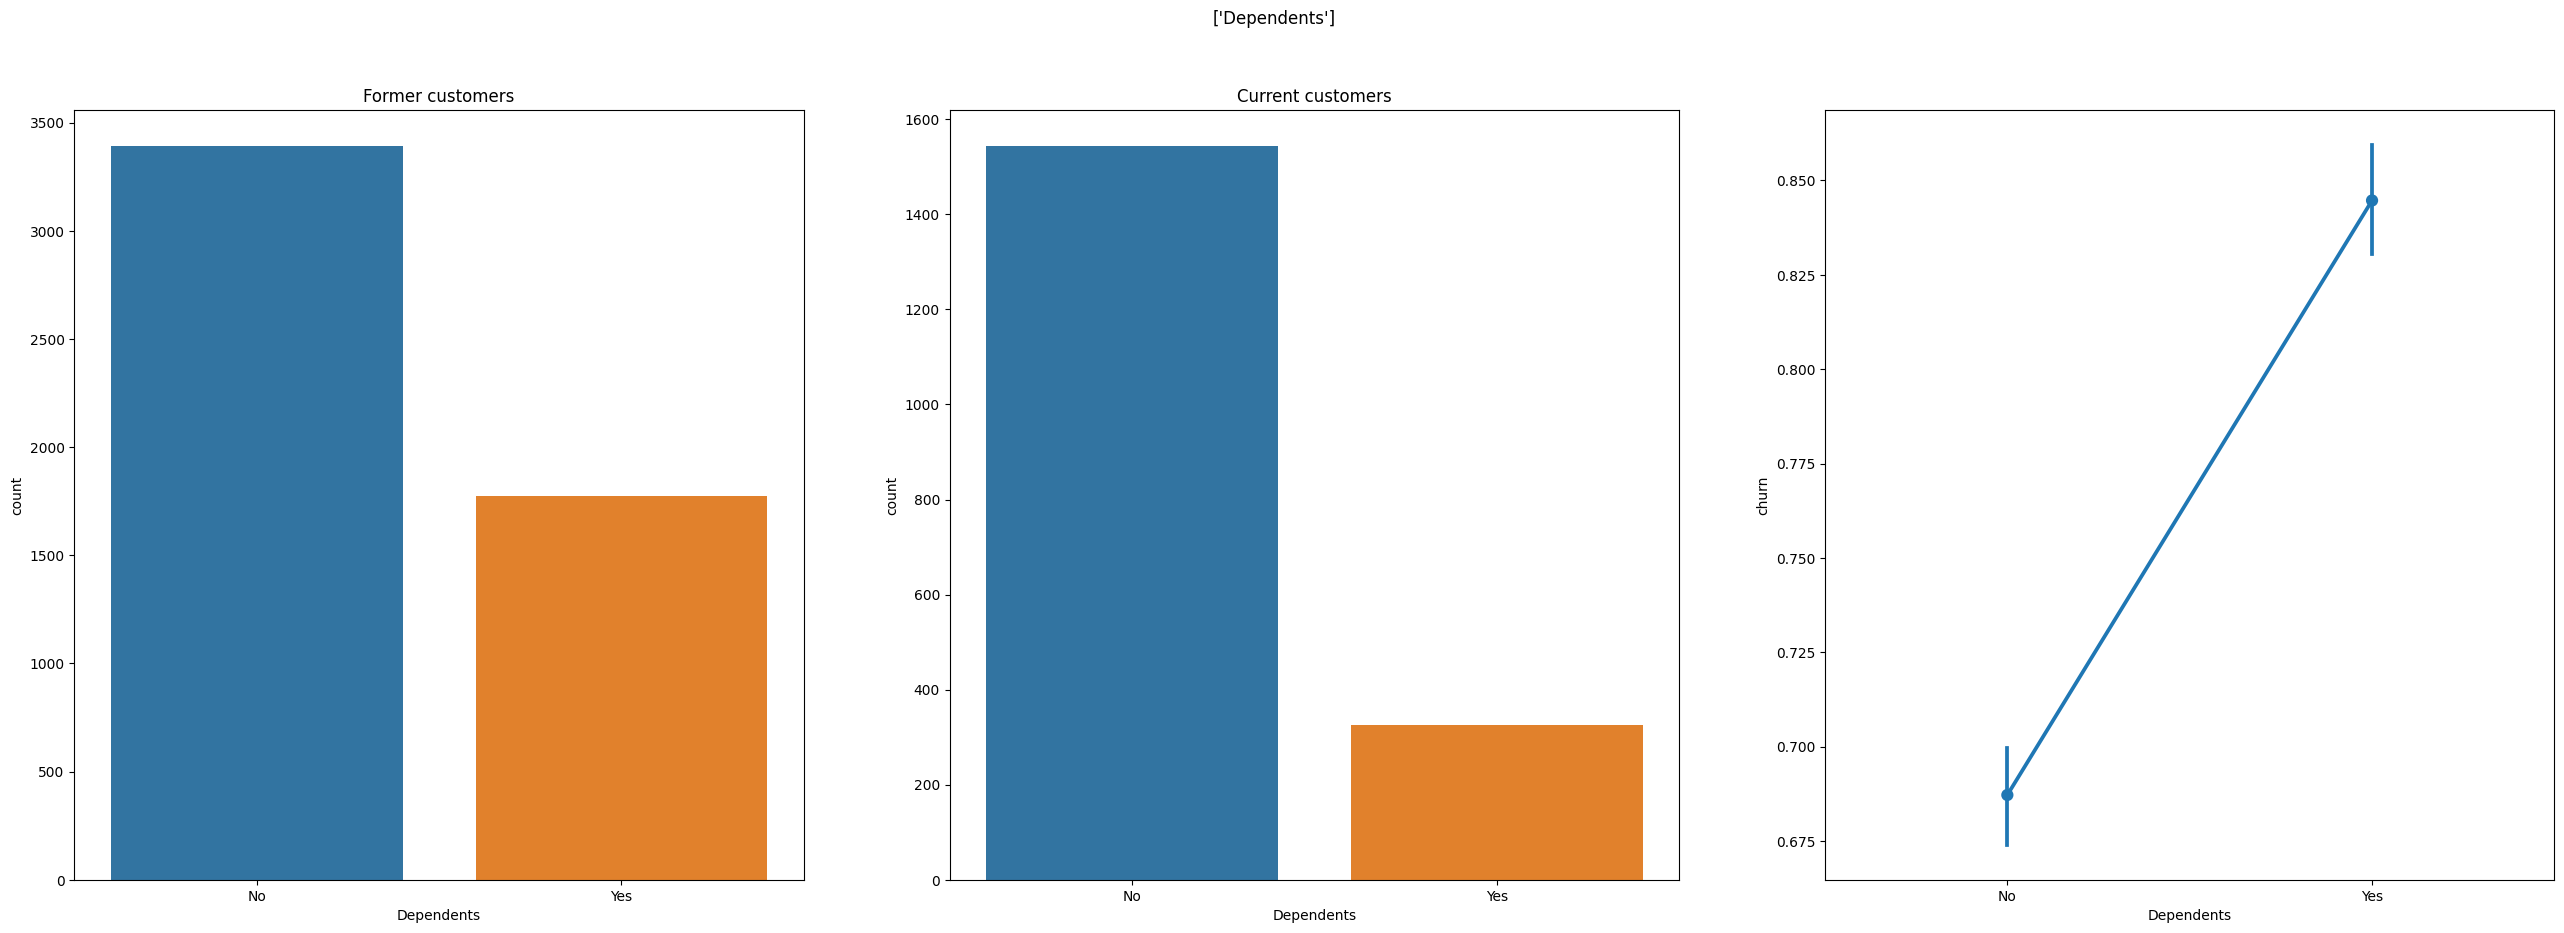

In [ ]:
visualize = ['gender','SeniorCitizen','Partner','PaymentMethod','PaperlessBilling','OnlineSecurity','InternetService',
            'MultipleLines','PhoneService','Dependents']
for columns in visualize:
    fig,axis=plt.subplots(1,3,figsize=(32,10))
    plt.suptitle([columns])
    sns.countplot(ax=axis[0],x=former[columns],data=former).set(title='Former customers')
    sns.countplot(ax=axis[1],x=current[columns],data=current).set(title='Current customers')
    sns.pointplot(ax=axis[2],x=columns,y='churn',data=data2)

In [ ]:
data2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
churn                 int64
dtype: object

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for columns in yes_no_columns:
    data2.replace({'Yes':0,'No':1},inplace=True)
    data2.replace({'Female':0,'Male':1},inplace=True)

In [ ]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,0,0,0,1,1,1,1,DSL,1,0,...,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,0,1
1,1,0,1,1,34,0,1,DSL,0,1,...,1,1,1,One year,1,Mailed check,56.95,1889.50,0,1
2,1,0,1,1,2,0,1,DSL,0,0,...,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,1,0
3,1,0,1,1,45,1,1,DSL,0,1,...,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,0,1
4,0,0,1,1,2,0,1,Fiber optic,1,1,...,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,1,0


In [ ]:
data3 = pd.get_dummies(data2,columns=['InternetService','Contract','PaymentMethod'])
data3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'InternetService_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data3[cols_to_scale] = scaler.fit_transform(data3[cols_to_scale])

In [ ]:
data3[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [ ]:
data3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'InternetService_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
data4 = data3.drop(['churn','SeniorCitizen','Dependents'],axis=1)
data4.columns

Index(['gender', 'Partner', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
x = data4.drop('Churn',axis='columns')
y = data4.Churn

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
print('x train: ',len(x_train))
print('x test: ',len(x_test))
print('y train: ',len(y_train))
print('y test: ',len(y_test))

x train:  5625
x test:  1407
y train:  5625
y test:  1407


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 500,learning_rate =0.01,max_depth=10,subsample=0.75,random_state=1)
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.7782515991471215

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
print(log.score(x_train,y_train))
print(log.score(x_test,y_test))

0.8078222222222222
0.7945984363894811


In [ ]:
log_pred = log.predict(x_test)
log_pred[:5]

array([0, 0, 0, 1, 1])

In [ ]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.57      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
crossvalidation = KFold(n_splits=5,shuffle=True,random_state=1)
parameters = {'n_estimators':[50,1000,2000],'learning_rate':[0.01,0.1,0.5],'max_depth':[1,5,10],'subsample':[0.5,0.75,1],'random_state':[1]}
search = GridSearchCV(estimator=gb,param_grid=parameters,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [ ]:
data4.shape

(7032, 25)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(24,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5215 - accuracy: 0.7346
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7899
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4082 - accura

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7896


[0.44815513491630554, 0.7896233201026917]

In [ ]:
y_test.head()

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(88.25, 0.5, 'Truth')

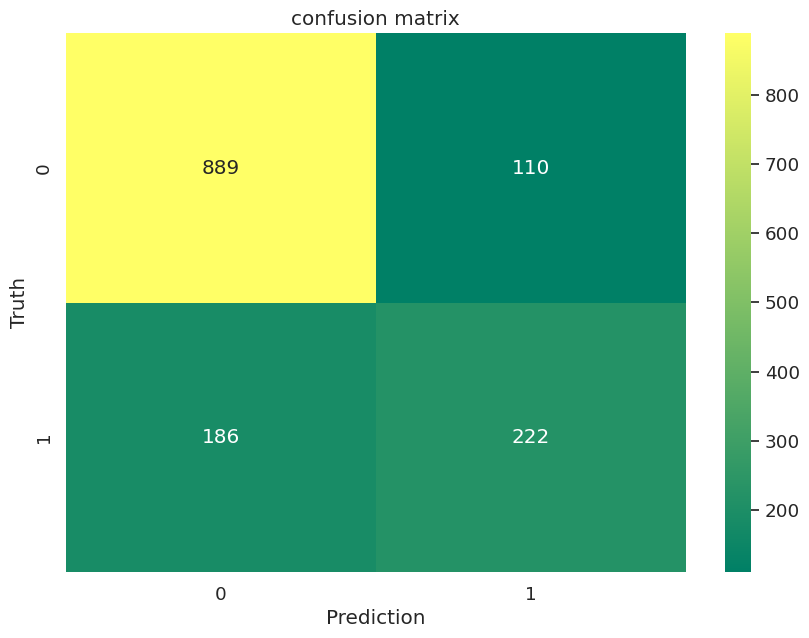

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(con_mat,annot=True,cmap='summer',fmt='d')
plt.title('confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')